In [21]:
from scipy import signal
from scipy.signal import chirp, spectrogram
from scipy.fftpack import fft, ifft

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18})

import soundfile as sf
import IPython.display as ipd

In [22]:
# sample rate
fs = 10000
# final time
tf = 1
t = np.linspace(0,tf,int(tf*fs))
NFFT = 2**(int(np.log2(len(t)))) # lowest power of 2
# frequency vector for plotting
freq = fs*np.arange(0,1,1/NFFT)

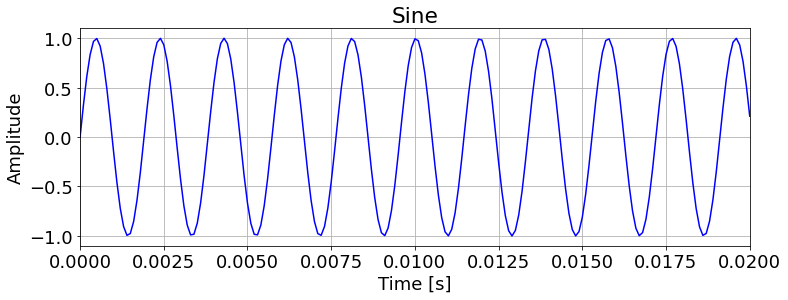

In [23]:
# Sine
f0 = 523.25 # C5

phi0 = 2*np.pi*f0*t
y0 = np.sin(phi0);

fig = plt.figure(figsize=(12,4))
plt.plot(t,y0,'b-')
plt.xlim([0,0.02])
plt.title('Sine')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [24]:
sf.write('y0.wav', y0, fs)
ipd.Audio('y0.wav', rate=fs) # 

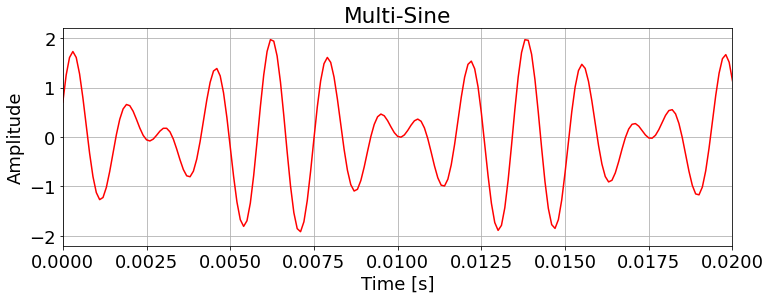

In [31]:
# multisine
f1 = 659.25 # E5
offset = np.pi/4
phi1 = 2*np.pi*f1*t + offset

y01 = y0 + np.sin(phi1);

fig = plt.figure(figsize=(12,4))
plt.plot(t,y01,'r-')
plt.xlim([0,0.02])
plt.title('Multi-Sine')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

sf.write('y01.wav', y01, fs)
ipd.Audio('y01.wav', rate=fs) # 

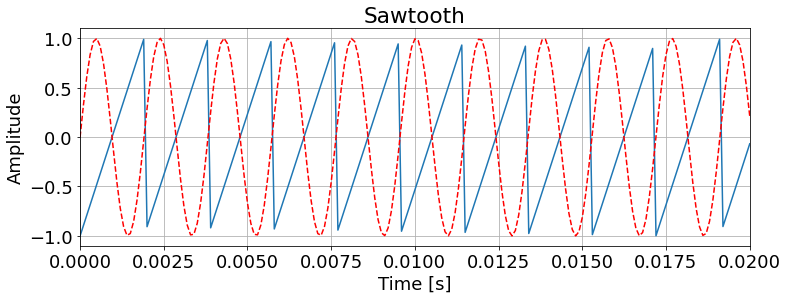

In [26]:
# Sawtooth
ys1 = signal.sawtooth(phi0);

fig = plt.figure(figsize=(12,4))
plt.plot(t,ys1)
plt.plot(t,y0,'r--')
plt.xlim([0,0.02])
plt.title('Sawtooth')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

sf.write('ys1.wav', ys1, fs)
ipd.Audio('ys1.wav', rate=fs) # 

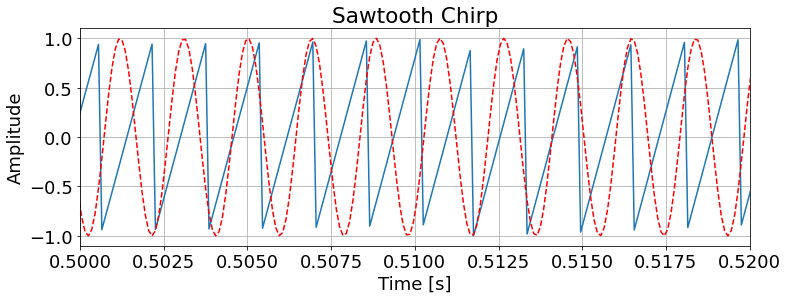

In [27]:
# Sawtooth chirp
beta = (f1 - f0) / tf**2
# for a chirp the frequency changes with time
fchirp = lambda t: f0 + beta * t**2

phi2 = 2*np.pi*(fchirp(t) * t)
ys2 = signal.sawtooth(phi2);

fig = plt.figure(figsize=(12,4))
plt.plot(t,ys2)
plt.plot(t,y0,'r--')
plt.xlim([tf/2,tf/2+0.02])
plt.title('Sawtooth Chirp')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

sf.write('ys2.wav', ys2, fs)
ipd.Audio('ys2.wav', rate=fs) # 

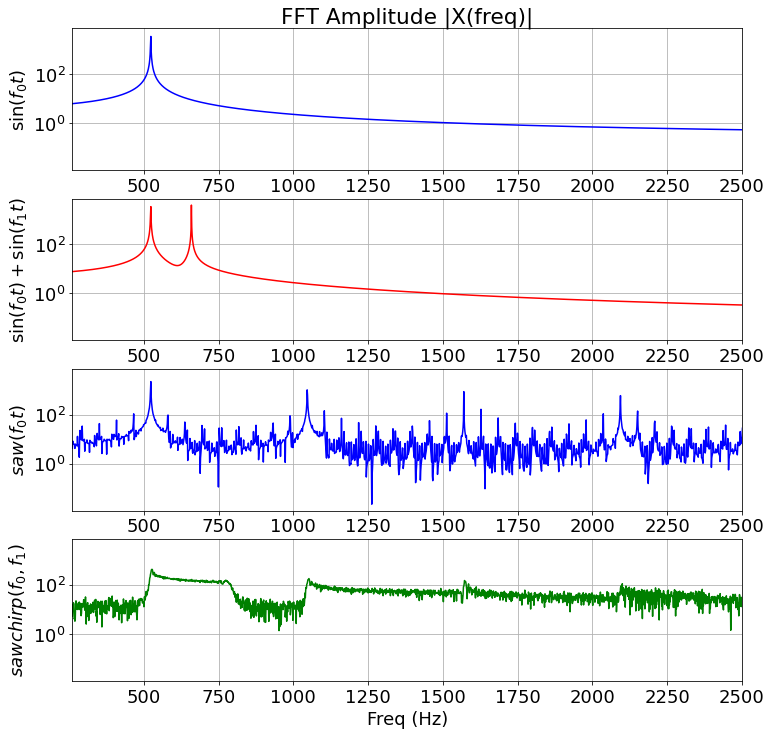

In [32]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(411)
X = fft(y0[:NFFT])
ax1.semilogy(freq, np.abs(X), 'b')
ax1.set_ylabel('$\sin(f_0 t)$')
ax1.set_title('FFT Amplitude |X(freq)|')
ax1.grid()
ax1.set_xlim(f0/2, fs/4)

ax2 = plt.subplot(412,sharex=ax1,sharey=ax1)
X = fft(y01[:NFFT])
ax2.semilogy(freq, np.abs(X), 'r')
ax2.set_ylabel('$\sin(f_0 t)+\sin(f_1 t)$')
ax2.grid()

ax3 = plt.subplot(413,sharex=ax1,sharey=ax1)
X = fft(ys1[:NFFT])
ax3.semilogy(freq, np.abs(X), 'b')
ax3.set_ylabel('$saw(f_0 t)$')
ax3.grid()

ax4 = plt.subplot(414,sharex=ax1,sharey=ax1)
X = fft(ys2[:NFFT])
ax4.semilogy(freq, np.abs(X), 'g-')
ax4.set_ylabel('$sawchirp(f_0,f_1)$')
ax4.grid()
ax4.set_xlabel('Freq (Hz)')

plt.show()

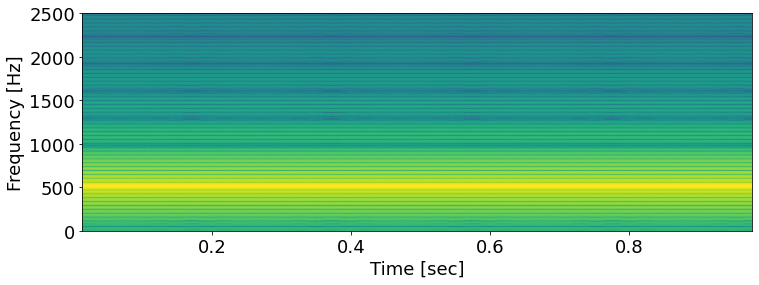

In [40]:
ff0, tt0, Sxx0 = signal.spectrogram(y0, fs, detrend=False, nfft = NFFT)
ff01, tt01, Sxx01 = signal.spectrogram(y01, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt0, ff0, np.log10(Sxx0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0,fs/4])
plt.show()

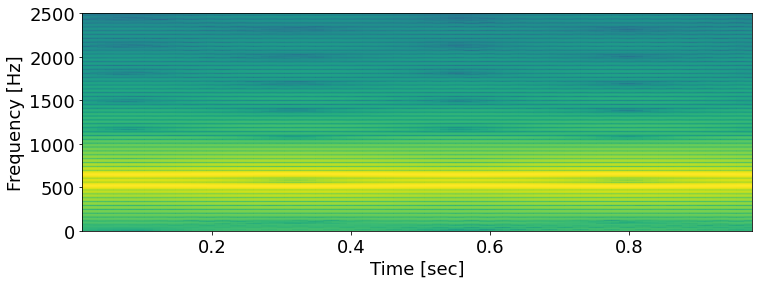

In [41]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt01, ff01, np.log10(Sxx01), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0,fs/4])
plt.show()

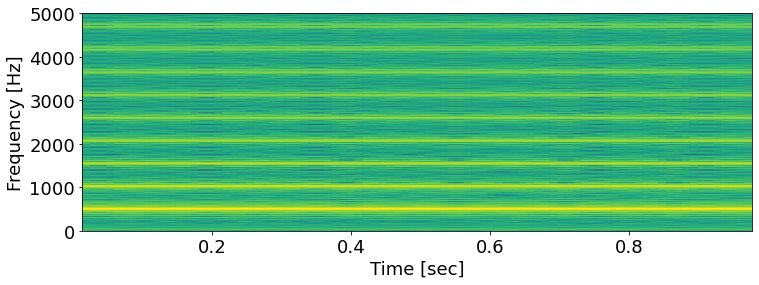

In [42]:
ff1, tt1, Sxx1 = signal.spectrogram(ys1, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt1, ff1, np.log10(Sxx1), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0,fs/2])
plt.show()

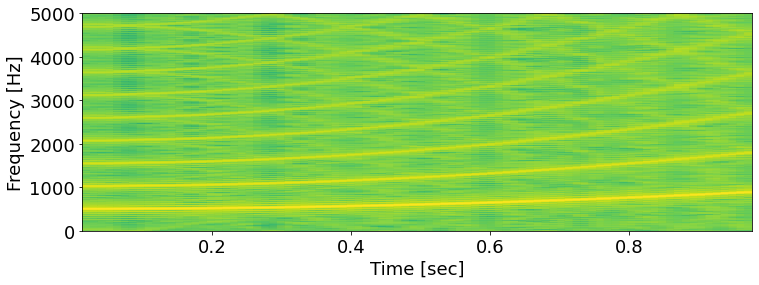

In [43]:
ff2, tt2, Sxx2 = signal.spectrogram(ys2, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt2, ff2, np.log10(Sxx2), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, fs/2])
plt.show()